## K Nearest Neighbors

Euclidean Distance 2D = $\sqrt{(x_{2} - x_{1})^{2} + (y_{2} - y_{1})^2}$

Generalized Euclidean Distance = $\sqrt{\sum_{i=1}^{n} (q_{i} - p_{i})^{2}}$

In [34]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use(['dark_background'])

In [91]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        # Calculate the distances
        distances = [np.sqrt(np.sum(x - x_train)**2) for x_train in self.X_train]
        # Sort the distances up to the specified k value
        indices = np.argsort(distances)[:self.k]
        # Get the labels of the sorted distances
        k_labels = [self.y_train[i] for i in indices]
        # Get the most common occurence of the labels
        return np.argmax(np.bincount(k_labels))

In [103]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

print(f'X_train shape: {X_train.shape} // y_train shape: {y_train.shape}')

X_train shape: (120, 4) // y_train shape: (120,)


In [11]:
X_train[:5]

array([[5.7, 3.8, 1.7, 0.3],
       [4.9, 3. , 1.4, 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [5.2, 4.1, 1.5, 0.1],
       [5.6, 2.5, 3.9, 1.1]])

In [12]:
y_train

array([0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2,
       1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 2])

In [51]:
X_train[y_train == 1][:5]

array([[6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5. , 2.3, 3.3, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [6.1, 2.8, 4. , 1.3]])

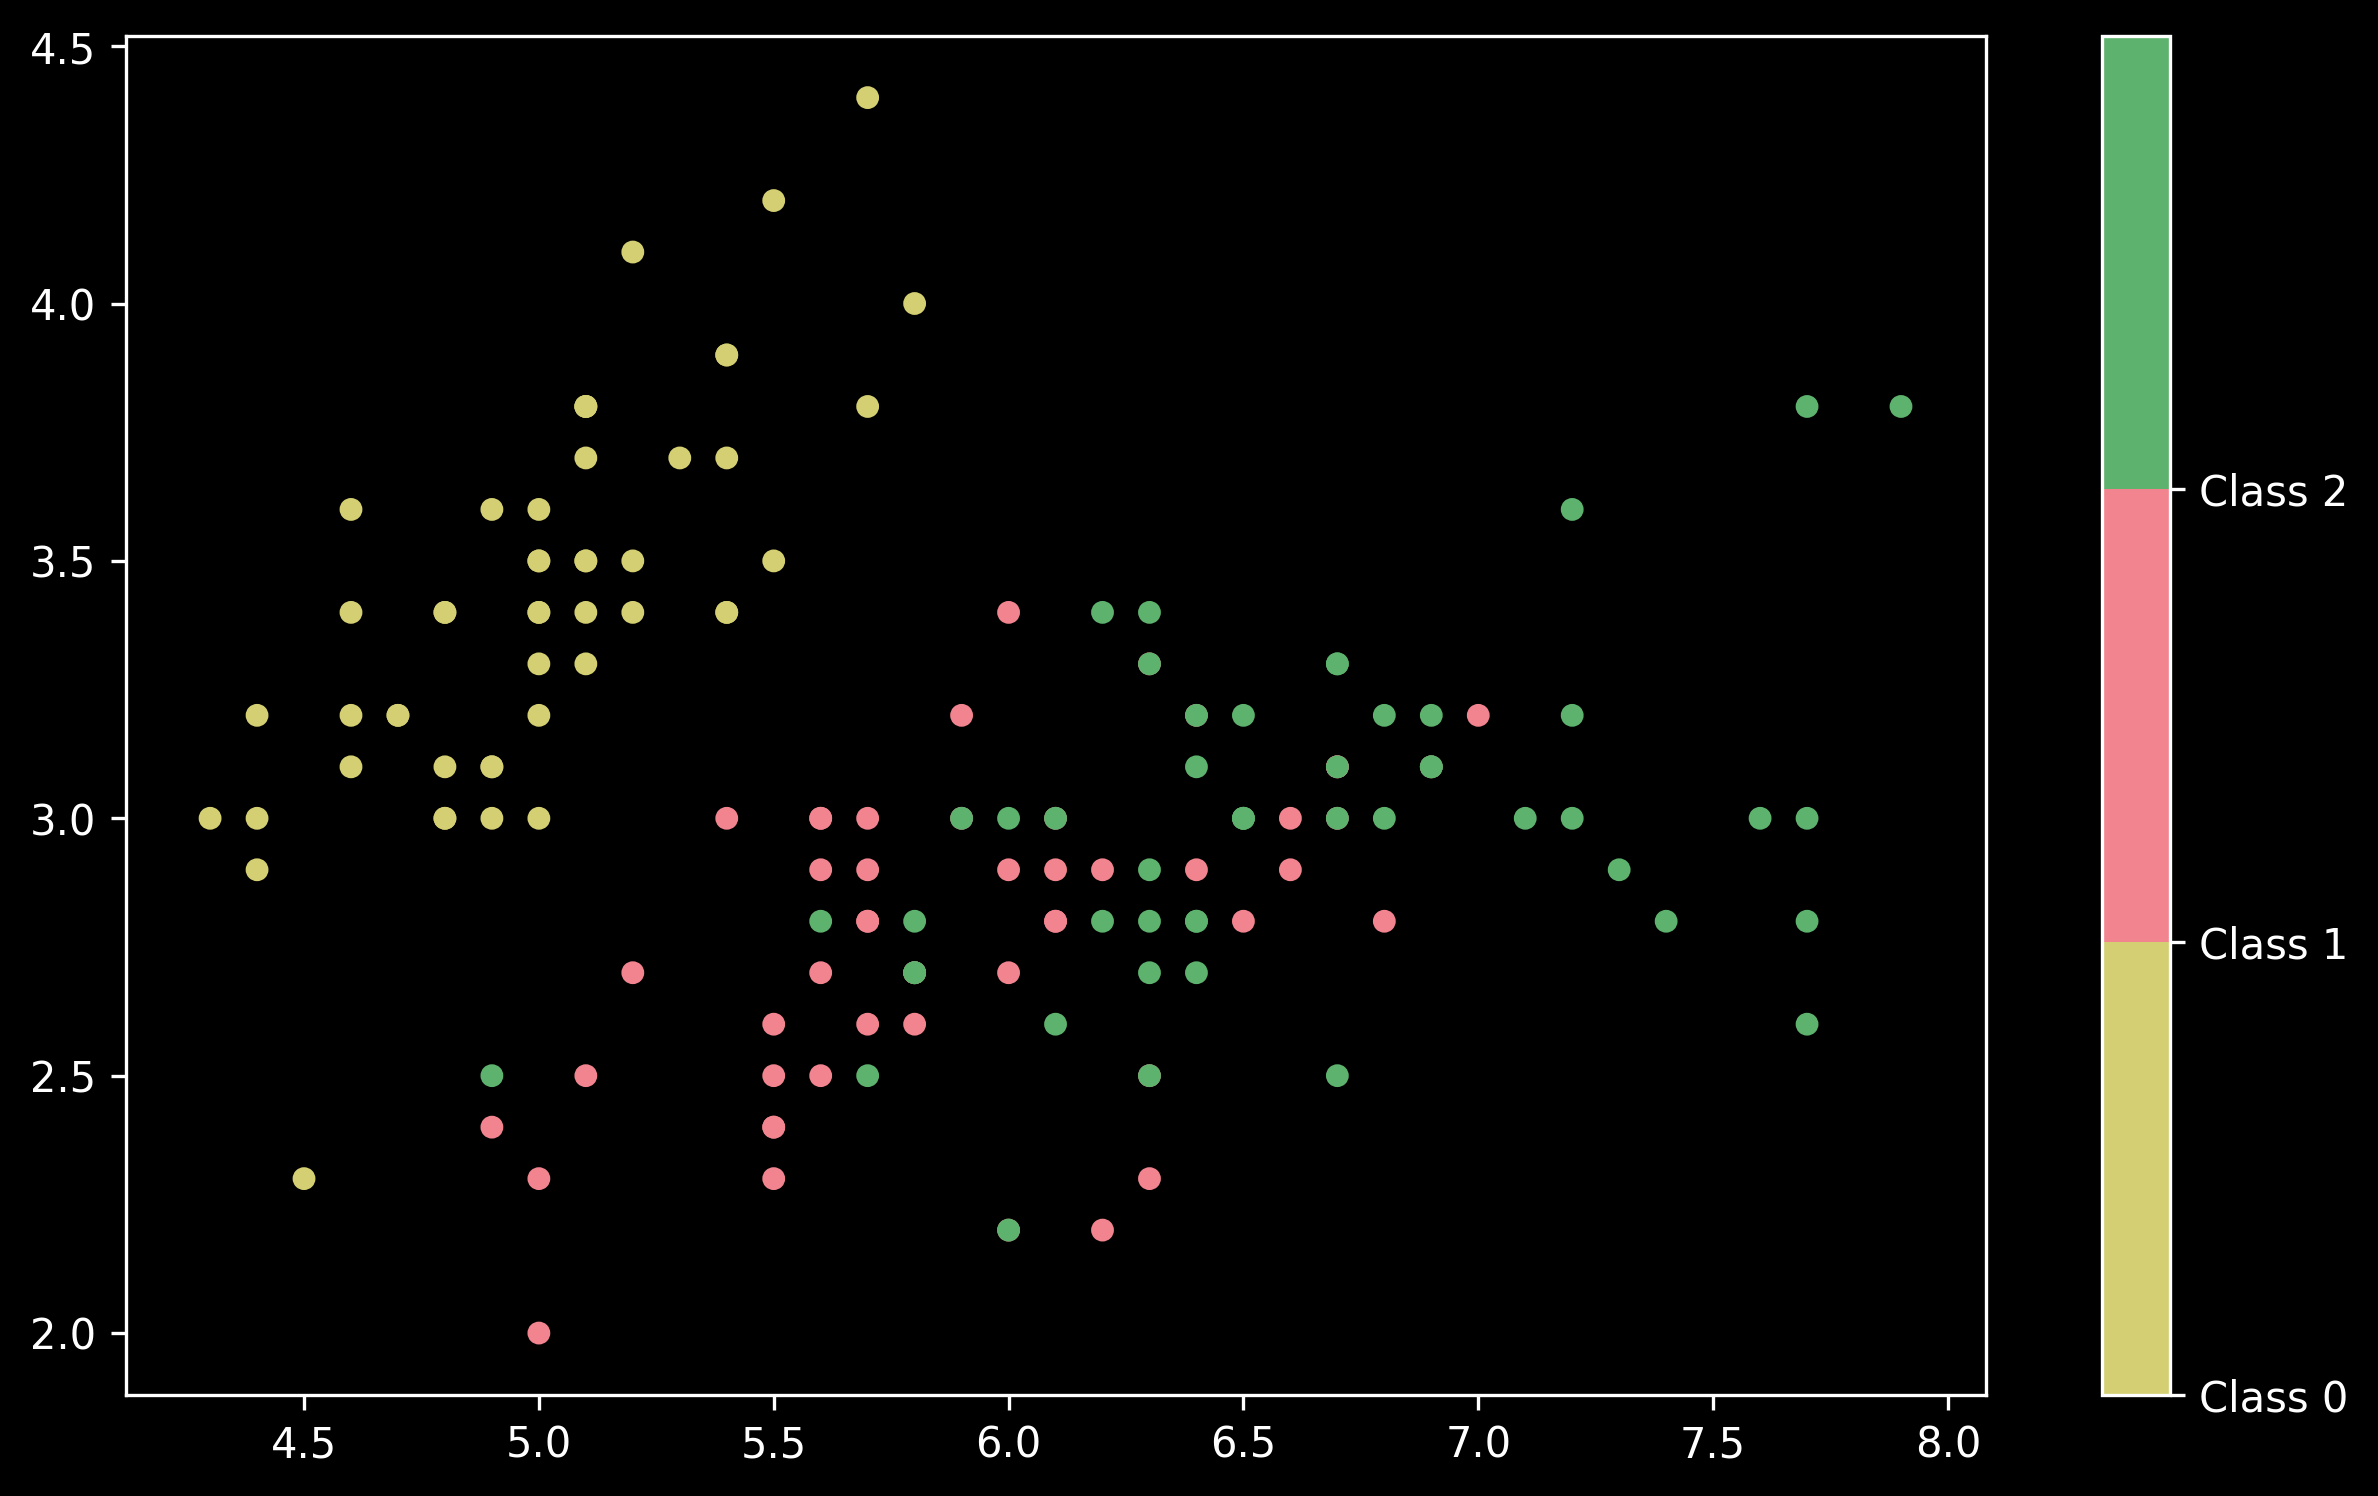

In [61]:
color_l = ['#D4CF72', '#F2848F', '#5DB26D']

plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(X[:,0], X[:,1], c=y, s=20,
                            cmap=colors.ListedColormap(color_l))

cb = plt.colorbar()
loc = np.arange(0, max(y), max(y)/len(color_l))
cb.set_ticks(loc)
cb.set_ticklabels(['Class 0', 'Class 1', 'Class 2'])

In [105]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f'Accuracy: {round((np.sum(y_pred == y_test) / len(y_test))*100, 2)}%')

Accuracy: 86.67%
